### WHAT LEARNT FROM 9 CODES SHARED:

-  We have to stop convolution once we reach layer size **7x7 or 4x4 for MNIST dataset**,  reason is we have **reached the required receptive field**, we usually add padding and use GAP at the end.
-   Using **more than one MaxPooling exceeds the required receptive field**, So use **always one** MaxPooling.
-   Define the architecture in such a way that.
      -  **Use one layer before** and always convert it into specific number of channels, so that it will help u at the end when you use GAP else you will get stuck.
      -  **Convolution block** : Increase the channels size as required to find the edges and patterns of the image, this function is called several times and respectively it detects the objects.
      -  **Transition block** : It usually has **one Maxpooling** and the **bottlenect - 1x1** in any order. Maxpool divides the image resolution and 1x1 usually combines the features from the channels and its the best way to reduce channels.
- In all those 9 codes : We have increased the channels size sequentially and reduced it using 1x1 and used Maxpooling.

### MY STRATEGY:

### I have defined the architecture like the paper SQUEEZE AND EXCITATION NETWORKS.

### Increase channels using 3x3, immediately decrease it using 1x1, repeat it.

#### TOOLS USED AND OBSERVATIONS 

-   I have just increased the channels starting 128 to 64, 256 to 64, 512 to 64, MP, 128 to 64, 256 to 64, Final convolution (7x7x64), then 1x1x10 (Required output).
-  No Batch Normalization, No Dropout, No Learning rate schedular.
-  I have never cared about parameters in this network and used a whopping 7,79,594 parameters.
-  Using batch size = 32, and the Training accuracies are clearly increasing from 95.9 to 99.8 and it is clearly overfitting.
-   I have ran for 50 epochs and the validation accuracy reached the **MAXIMUM OF 99.280 in 35th epoch**

##Note : I have removed the comments for each cells as i have given many times in previous assignments (So that it looks clean).##

In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


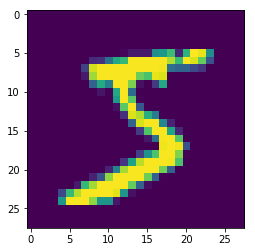

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(128, 3, 3, activation='relu', input_shape=(28,28,1))) # Receptive field : 3x3 , Resolution output : 26x26x128
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 3x3 , Resolution output : 26x26x64

model.add(Convolution2D(256, 3, 3, activation='relu')) # Receptive field : 5x5 , Resolution output : 24x24x256
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 5x5 , Resolution output : 26x26x64

model.add(Convolution2D(512, 3, 3, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x512
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 7x7 , Resolution output : 22x22x64

model.add(MaxPooling2D(pool_size=(2,2))) # Receptive field : 14x14 , Resolution output : 11x11x64

model.add(Convolution2D(128, 3, 3, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x128
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 16x16 , Resolution output : 9x9x10

model.add(Convolution2D(256, 3, 3, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x256
model.add(Convolution2D(64, 1,1, activation='relu')) # Receptive field : 18x18 , Resolution output : 7x7x64

model.add(Convolution2D(10, 7, 7)) , #Resolution output : 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launch

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       147712    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        16448     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 512)       295424    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
__________

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!wget https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
from clr_callback import *

--2019-05-20 12:32:56--  https://raw.githubusercontent.com/bckenstler/CLR/master/clr_callback.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326 (5.2K) [text/plain]
Saving to: ‘clr_callback.py.1’

clr_callback.py.1   100%[===================>]   5.20K  --.-KB/s    in 0s      

2019-05-20 12:32:56 (72.4 MB/s) - ‘clr_callback.py.1’ saved [5326/5326]



In [0]:
filepath="/content/gdrive/My Drive/Raajesh-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 39s 654us/step - loss: 0.1336 - acc: 0.9590 - val_loss: 0.0483 - val_acc: 0.9850

Epoch 00001: val_acc improved from -inf to 0.98500, saving model to /content/gdrive/My Drive/Raajesh-01-0.98.hdf5
Epoch 2/50
60000/60000 [==============================] - 36s 601us/step - loss: 0.0477 - acc: 0.9855 - val_loss: 0.0342 - val_acc: 0.9895

Epoch 00002: val_acc improved from 0.98500 to 0.98950, saving model to /content/gdrive/My Drive/Raajesh-02-0.99.hdf5
Epoch 3/50
60000/60000 [==============================] - 37s 612us/step - loss: 0.0331 - acc: 0.9898 - val_loss: 0.0443 - val_acc: 0.9873

Epoch 00003: val_acc did not improve from 0.98950
Epoch 4/50
60000/60000 [==============================] - 37s 609us/step - loss: 0.0277 - acc: 0.9913 - val_loss: 0.0285 - val_acc: 0.9913

Epoch 00004: val_acc improved from 0.98950 to 0.99130, saving

In [0]:
model.load_weights('/content/gdrive/My Drive/Raajesh-35-0.99.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04992204656002577, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.4885852e-22 1.8584851e-24 2.2860996e-15 5.7431899e-18 4.4590766e-30
  2.1778216e-28 1.4839376e-30 1.0000000e+00 4.4869590e-22 3.6886535e-19]
 [4.3564312e-22 1.4092605e-19 1.0000000e+00 2.9900651e-22 5.8942276e-26
  1.2606925e-33 2.0376627e-15 4.5271940e-28 1.4901491e-15 8.3664202e-29]
 [1.7395434e-16 1.0000000e+00 2.9318386e-16 7.6498342e-21 4.8471052e-13
  3.9287847e-11 9.6509782e-15 3.5182416e-11 2.2392233e-12 7.4645897e-14]
 [1.0000000e+00 2.2252347e-29 3.3033769e-32 1.0443227e-24 4.6064332e-31
  1.1351049e-21 2.5551555e-17 6.7344470e-27 8.8497427e-32 3.6144871e-23]
 [5.4220152e-23 2.9810065e-25 2.4603769e-22 6.8316808e-28 1.0000000e+00
  5.0470665e-33 2.9210109e-23 1.5570171e-30 8.1676197e-23 3.6143326e-17]
 [4.6811758e-21 1.0000000e+00 4.7628158e-18 1.2110025e-22 8.8447069e-11
  2.5945819e-17 1.0772040e-20 8.4353535e-10 7.2784481e-13 1.4713570e-14]
 [4.0512620e-38 7.3239000e-21 2.8632553e-24 8.4219751e-37 1.0000000e+00
  9.4783066e-20 2.3751585e-27 1.6118014e-22 1.0640521e-11 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()